In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats 

# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

import missingno as msngo
import warnings

from IPython.display import display, Markdown

#from utils import get_graph, get_graph_2D
#from preproc_nyc_sqf import create_suitable_dataframe

pd.set_option("display.max_rows", 112)
pd.set_option("display.max_info_columns", 112)
pd.set_option("display.max_colwidth", 3000)

warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

In [139]:
# Importa df

df = pd.read_csv("base_proyectoV3_20200125_v5.csv", sep=";", parse_dates=['ADHR_FECHA_INICIO_VIGENCIA','ADHR_FECHA_TERMINO','ADHR_FECHA_INICIO_CORR'])

In [140]:
# coloca fecha 31-12-19 a los perdidos en fecha termino

df['ADHR_FECHA_TERMINO']=df['ADHR_FECHA_TERMINO'].fillna(pd.to_datetime('2019-12-31 23:59:59'))

In [141]:
#2 calcula el tiempo de estadia de la empresa desde 2008 en dias

df['Tiempo_Estadia']=(df['ADHR_FECHA_TERMINO'] - df['ADHR_FECHA_INICIO_CORR']).dt.days

In [142]:
#en dias_de_reposo se llevan los Nan a cero

df['DIAS_REP']=df['DIAS_REP'].fillna(0)

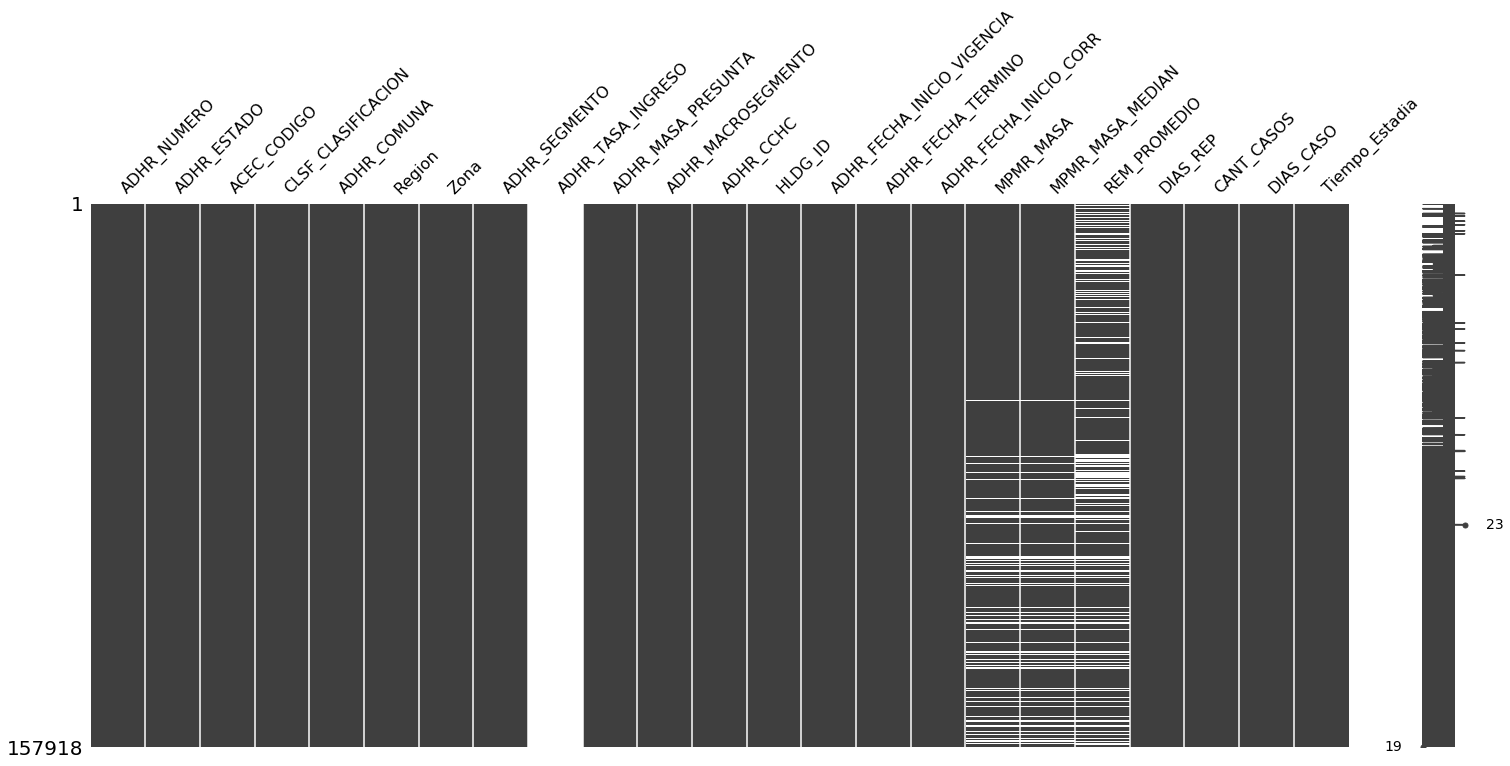

In [144]:
#para ver el tipo de variable

def tipo_variable (DataFrame):
        for i in DataFrame.columns:
           print("La variable {} es de tipo {}.".format(i, DataFrame[i].dtype))
        
tipo_variable(df)

La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable Region es de tipo int64.
La variable Zona es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_TASA_INGRESO es de tipo float64.
La variable ADHR_MASA_PRESUNTA es de tipo int64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo int64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable MPMR_MASA_MEDIAN es de tipo float64.
La variable REM_PROMEDIO es de tipo float64.
La variable DIAS_REP es de tipo float64.
La variable CANT_CASOS es de tipo int64.
La variable DIAS_CASO es de ti

In [145]:

indexNames = df[ (df['Tiempo_Estadia'] < 180) | (df['REM_PROMEDIO'].isnull()) | df['MPMR_MASA_MEDIAN'].isnull()].index
df_drop = df.drop(indexNames).reset_index()

In [146]:
df_drop.drop('ADHR_TASA_INGRESO', axis = 1, inplace = True)

## TIEMPOS DE ESTADIA CEROOOOOOOO

In [147]:
df_drop['Tiempo_Estadia'].min()

180

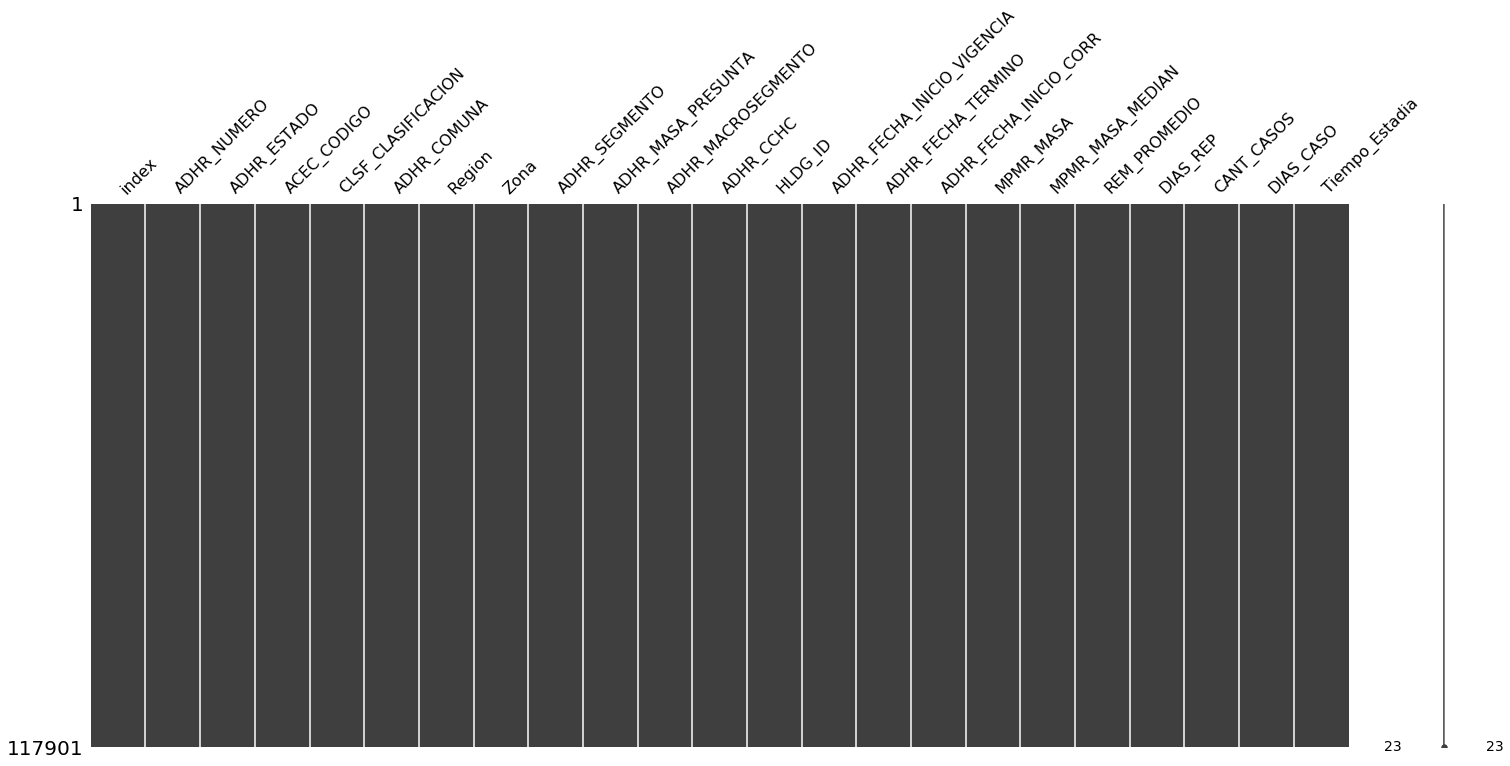

In [148]:
msngo.matrix(df_drop)

In [149]:
df_drop['CANT_CASOS'] = df_drop['CANT_CASOS'].replace({0:1})

In [150]:
#3 dividir dias de reposo por AÑO de estadia y se valida perdidos en este calculo

df_drop['VECTOR_OBJETIVO']= df_drop['DIAS_REP']/df_drop['CANT_CASOS']

df_drop.isnull().sum(axis = 0)

index                         0
ADHR_NUMERO                   0
ADHR_ESTADO                   0
ACEC_CODIGO                   0
CLSF_CLASIFICACION            0
ADHR_COMUNA                   0
Region                        0
Zona                          0
ADHR_SEGMENTO                 0
ADHR_MASA_PRESUNTA            0
ADHR_MACROSEGMENTO            0
ADHR_CCHC                     0
HLDG_ID                       0
ADHR_FECHA_INICIO_VIGENCIA    0
ADHR_FECHA_TERMINO            0
ADHR_FECHA_INICIO_CORR        0
MPMR_MASA                     0
MPMR_MASA_MEDIAN              0
REM_PROMEDIO                  0
DIAS_REP                      0
CANT_CASOS                    0
DIAS_CASO                     0
Tiempo_Estadia                0
VECTOR_OBJETIVO               0
dtype: int64

In [151]:
df_drop.shape

(117901, 24)

In [152]:
#calcular promedio de trabajadores periodo (masa presunta inicial;masa final)

#df_drop['prom_emp']= (df_drop['ADHR_MASA_PRESUNTA']+df_drop['MPMR_MASA'])/2

In [153]:
#se revisa la variable calculada

#df_drop['prom_emp'].head(30)

In [154]:
#5: dividir 3 por 4 (tasa_1 por promedio_emp)

#df_drop['vector_objetivo']= round(df_drop['tasa_1']/df_drop['MPMR_MASA_MEDIAN'],2)

In [155]:
# revisamos el vector objetivo

df_drop['VECTOR_OBJETIVO'].sample(10)

113517      0.000000
8472       13.812500
65394       0.000000
77071       0.000000
98197       0.000000
15409     108.000000
6605       95.000000
19492      12.666667
116242      0.000000
13573      14.333333
Name: VECTOR_OBJETIVO, dtype: float64

In [156]:
df_drop['VECTOR_OBJETIVO'].describe()

count    117901.000000
mean         12.153106
std          28.664473
min           0.000000
25%           0.000000
50%           1.000000
75%          13.333333
max        1061.000000
Name: VECTOR_OBJETIVO, dtype: float64

In [189]:
df_drop.sort_values('VECTOR_OBJETIVO',ascending=False).head(10)


,index,ADHR_NUMERO,ADHR_ESTADO,ACEC_CODIGO,CLSF_CLASIFICACION,ADHR_COMUNA,Region,Zona,ADHR_SEGMENTO,ADHR_MASA_PRESUNTA,...,MPMR_MASA,MPMR_MASA_MEDIAN,REM_PROMEDIO,DIAS_REP,CANT_CASOS,DIAS_CASO,Tiempo_Estadia,VECTOR_OBJETIVO,ACEC_CODIGO_AGG,holding_bin
1522,2111,62140,A,83101,ALQUILER DE OTROS TIPOS DE MAQUINARIAS Y EQUI,ANTOFAGASTA,2,NORTE,CORP,27,...,62.0,38.0,1066218.0,1061.0,1,1061,4382,1061.000000,8,0
2287,3249,156939,A,50037,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,",HUALPEN,8,CENTRO,PYME,3,...,4.0,4.0,371552.0,750.0,1,750,2189,750.000000,5,0
2350,3347,172077,A,71921,SERVICIOS INTEGRALES DE SEGURIDAD,CONCEPCION,8,CENTRO,PYME,14,...,8.0,7.0,323583.0,735.0,1,735,2183,735.000000,7,0
2374,3382,247305,A,83103,CONSEJO DE ADMINISTRACION DE EDIFICIOS Y COND,VITACURA,13,CENTRO,PYME,5,...,6.0,6.0,347289.0,729.0,1,729,1093,729.000000,8,0
2449,3489,167510,A,94906,ACTIVIDADES DE CLUBES DE DEPORTES Y ESTADIOS,NUNOA,13,CENTRO,PYME,3,...,4.0,3.0,1517576.0,708.0,1,708,2184,708.000000,9,0
2487,3549,245823,A,83264,ACTIVIDADES DE ASESORAMIENTO EMPRESARIAL Y EN,VITACURA,13,CENTRO,PYME,24,...,30.0,30.0,1692667.0,698.0,1,698,1094,698.000000,8,0
2613,3736,85058,A,62531,"VENTA AL POR MENOR DE CARBON, LENA Y OTROS CO",LINARES,7,CENTRO,PYME,4,...,3.0,3.0,503201.0,671.0,1,671,3645,671.000000,6,0
789,1031,77135,A,38197,FABRICACION DE OTROS PRODUCTOS ELABORADOS DE,CHILLAN,8,CENTRO,PYME,5,...,4.0,3.0,400000.0,1901.0,3,"633,67",4010,633.666667,3,0
2978,4286,175055,A,50011,OBRAS DE INGENIERIA,QUINTA DE TILCOCO,6,CENTRO,PYME,7,...,7.0,6.0,196006.0,601.0,1,601,2182,601.000000,5,0
2999,4312,260065,A,50031,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,",QUILICURA,13,CENTRO,PYME,1,...,2.0,2.0,200670.0,597.0,1,597,1088,597.000000,5,0


{'whiskers': [<matplotlib.lines.Line2D at 0x20621dc94a8>,
 'caps': [<matplotlib.lines.Line2D at 0x2060eb63048>,
 'boxes': [<matplotlib.lines.Line2D at 0x20621dc99e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2060eb63f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x2060eb63630>],
 'means': []}

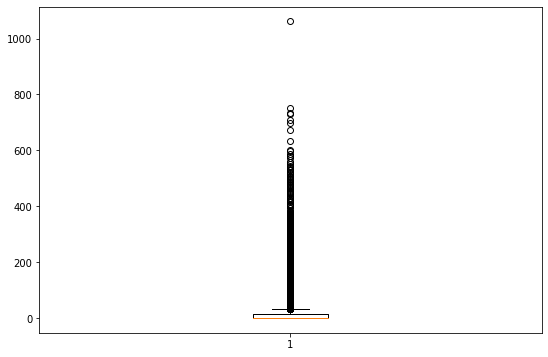

In [209]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)
ax.boxplot(df_drop['VECTOR_OBJETIVO'])

In [211]:
df_drop['VECTOR_OBJETIVO'] = df_drop['VECTOR_OBJETIVO'].replace(1061, np.nan)

In [235]:
df_drop = df_drop.dropna(axis = 0)

In [236]:
df_drop['VECTOR_OBJETIVO'].describe()


count    117900.000000
mean         12.144209
std          28.501372
min           0.000000
25%           0.000000
50%           1.000000
75%          13.333333
max         750.000000
Name: VECTOR_OBJETIVO, dtype: float64

In [237]:
# revisamos el vector objetivo

df_drop['VECTOR_OBJETIVO'].sample(20)

7245        7.878788
3101      192.666667
15302      36.333333
111013      0.000000
73700       0.000000
3653       16.000000
55804       3.000000
97408       0.000000
51227       5.000000
96047       0.000000
4400       32.307692
48518       7.000000
112054      0.000000
52970       4.000000
68916       0.000000
79389       0.000000
72197       0.000000
117652      0.000000
86475       0.000000
68094       0.000000
Name: VECTOR_OBJETIVO, dtype: float64

In [238]:
# revisamos el vector objetivo

#df_drop['vector_objetivo'].tail(50)

In [239]:
tipo_variable(df_drop)

La variable index es de tipo int64.
La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable Region es de tipo int64.
La variable Zona es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_MASA_PRESUNTA es de tipo int64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo int64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable MPMR_MASA_MEDIAN es de tipo float64.
La variable REM_PROMEDIO es de tipo float64.
La variable DIAS_REP es de tipo float64.
La variable CANT_CASOS es de tipo int64.
La variable DIAS_CASO es de tipo object.
La 

In [240]:
def histograma(df, variable):
    """La función recibe la base de datos como un DataFrame y la variable (continua) a graficar
       Retorna el histograma con una línea vertical indicando donde se ubica la media"""
    temp = df[variable]
    temp = temp.dropna()
    plt.figure()
    plt.title(variable)
    
    sns.distplot(temp, rug=True)
    plt.axvline(temp.mean(), color='tomato', linestyle='--', label='mean')
    plt.axvline(temp.median(), color='tomato', linestyle='-', label='median')
    plt.legend()

In [241]:
df_drop['ACEC_CODIGO_AGG']=df_drop['ACEC_CODIGO'].astype(str).str.slice(stop=1).astype(int)

Text(0.5, 0, 'Actividad')

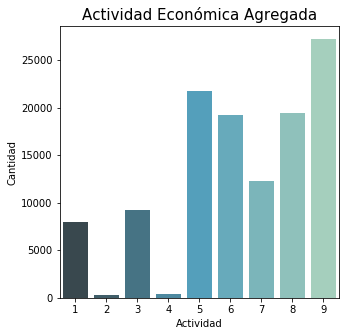

In [242]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='ACEC_CODIGO_AGG', palette="GnBu_d", orient='v')
plt.title('Actividad Económica Agregada', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Actividad')

Text(0.5, 0, 'Zona')

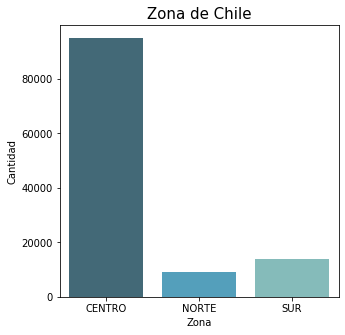

In [243]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='Zona', palette="GnBu_d", orient='v')
plt.title('Zona de Chile', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Zona')

Text(0.5, 0, 'Segmento')

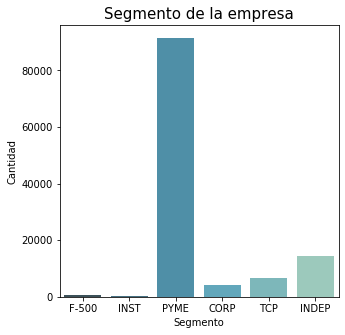

In [244]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='ADHR_SEGMENTO', palette="GnBu_d", orient='v')
plt.title('Segmento de la empresa', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Segmento')

Text(0.5, 0, 'Macrosegmento')

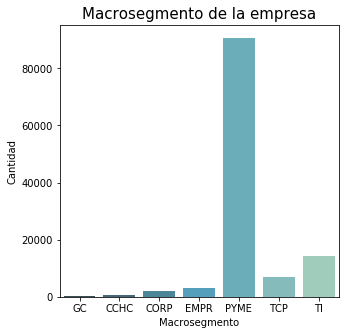

In [245]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='ADHR_MACROSEGMENTO', palette="GnBu_d", orient='v')
plt.title('Macrosegmento de la empresa', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Macrosegmento')

Text(0.5, 0, 'Camara Chilena')

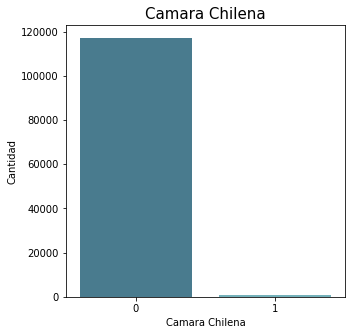

In [246]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='ADHR_CCHC', palette="GnBu_d", orient='v')
plt.title('Camara Chilena', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Camara Chilena')

In [247]:
df_drop['holding_bin'] = np.where(df_drop['HLDG_ID'] == 'H00000', 0, 1)

Text(0.5, 0, 'Holding')

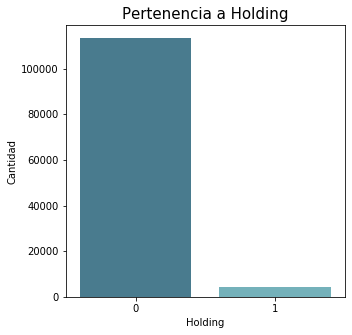

In [248]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop,x='holding_bin', palette="GnBu_d", orient='v')
plt.title('Pertenencia a Holding', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Holding')

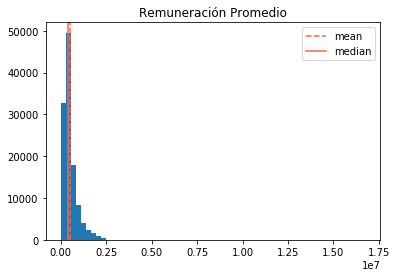

<Figure size 432x288 with 0 Axes>

In [249]:
plt.title('Remuneración Promedio')
plt.hist(df_drop['REM_PROMEDIO'], bins = 60)
plt.axvline(df_drop['REM_PROMEDIO'].mean(), color='tomato', linestyle='--', label='mean')
plt.axvline(df_drop['REM_PROMEDIO'].median(), color='tomato', linestyle='-', label='median')
plt.legend()
plt.show()
plt.clf()

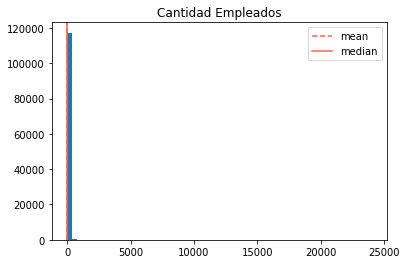

<Figure size 432x288 with 0 Axes>

In [250]:
plt.title('Cantidad Empleados')
plt.hist(df_drop['MPMR_MASA_MEDIAN'], bins = 60)
plt.axvline(df_drop['MPMR_MASA_MEDIAN'].mean(), color='tomato', linestyle='--', label='mean')
plt.axvline(df_drop['MPMR_MASA_MEDIAN'].median(), color='tomato', linestyle='-', label='median')
plt.legend()
plt.show()
plt.clf()

{'whiskers': [<matplotlib.lines.Line2D at 0x2060eea9f60>,
 'caps': [<matplotlib.lines.Line2D at 0x2060eeb9940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2060eea9e10>],
 'medians': [<matplotlib.lines.Line2D at 0x2060eeb9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2060eeb9f60>],
 'means': []}

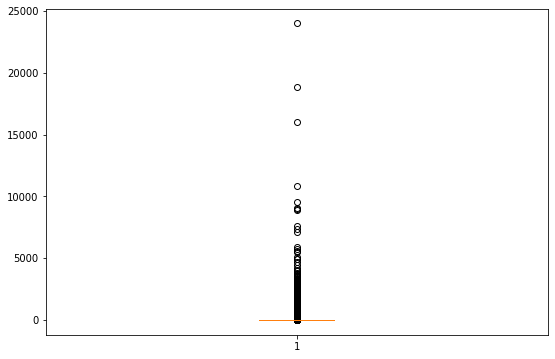

In [251]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)
ax.boxplot(df_drop['MPMR_MASA_MEDIAN'])

In [252]:
df_drop['MPMR_MASA_MEDIAN'].describe()

count    117900.000000
mean         19.326192
std         160.885878
min           1.000000
25%           1.000000
50%           5.000000
75%          12.000000
max       23996.000000
Name: MPMR_MASA_MEDIAN, dtype: float64

In [254]:
df_drop.sort_values('MPMR_MASA_MEDIAN',ascending=False).head(20)

,index,ADHR_NUMERO,ADHR_ESTADO,ACEC_CODIGO,CLSF_CLASIFICACION,ADHR_COMUNA,Region,Zona,ADHR_SEGMENTO,ADHR_MASA_PRESUNTA,...,MPMR_MASA,MPMR_MASA_MEDIAN,REM_PROMEDIO,DIAS_REP,CANT_CASOS,DIAS_CASO,Tiempo_Estadia,VECTOR_OBJETIVO,ACEC_CODIGO_AGG,holding_bin
3,3,227873,A,62103,GRANDES ESTABLECIMIENTOS (VENTA DE ALIMENTOS),QUILICURA,13,CENTRO,F-500,23119,...,15885.0,23996.0,510440.0,131020.0,7913,"16,62",1457,16.557564,6,1
7,7,220873,A,62410,GRANDES TIENDAS -VESTUARIO Y PRODUCTOS PARA E,LAS CONDES,13,CENTRO,PYME,1,...,13975.0,18866.0,506290.0,68206.0,4155,"16,49",1460,16.415403,6,1
4,4,101885,A,62103,GRANDES ESTABLECIMIENTOS (VENTA DE ALIMENTOS),LAS CONDES,13,CENTRO,F-500,9056,...,12210.0,16048.0,510811.0,111966.0,6749,"16,63",3280,16.590013,6,1
25,26,73797,A,81011,BANCOS,SANTIAGO,13,CENTRO,F-500,10753,...,8066.0,10840.0,155107.0,28661.0,1547,"18,53",4011,18.526826,8,1
9,9,227871,A,62103,GRANDES ESTABLECIMIENTOS (VENTA DE ALIMENTOS),QUILICURA,13,CENTRO,F-500,9555,...,7118.0,9534.0,500086.0,55657.0,3211,"17,38",1457,17.333230,6,1
23,24,36100,A,81011,BANCOS,SANTIAGO,13,CENTRO,F-500,7971,...,6601.0,9099.0,147908.0,31075.0,1617,"19,32",4382,19.217687,8,1
18,19,15400,A,81011,BANCOS,SANTIAGO,13,CENTRO,F-500,8,...,7735.0,9004.0,213036.0,39066.0,1391,"28,15",4382,28.084831,8,1
22,23,220871,A,62410,GRANDES TIENDAS -VESTUARIO Y PRODUCTOS PARA E,LAS CONDES,13,CENTRO,PYME,1,...,7610.0,8899.0,468451.0,31680.0,1962,"16,22",1460,16.146789,6,1
21,22,145070,A,31122,"ELABORACION DE LECHE, MANTEQUILLA, PRODUCTOS",LAS CONDES,13,CENTRO,F-500,8109,...,6213.0,7606.0,1271516.0,36302.0,1575,"23,08",2549,23.048889,3,0
13,13,227869,A,62103,"ALMACENES MEDIANOS (VENTA DE ALIMENTOS), SUPE",QUILICURA,13,CENTRO,F-500,7474,...,4302.0,7364.0,432013.0,46110.0,2714,"17,05",1457,16.989683,6,1


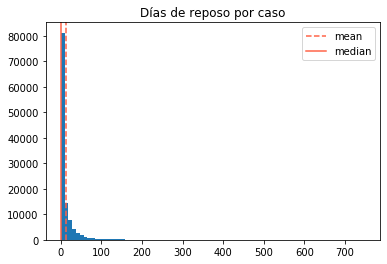

<Figure size 432x288 with 0 Axes>

In [255]:
plt.title('Días de reposo por caso')
plt.hist(df_drop['VECTOR_OBJETIVO'], bins = 80)
plt.axvline(df_drop['VECTOR_OBJETIVO'].mean(), color='tomato', linestyle='--', label='mean')
plt.axvline(df_drop['VECTOR_OBJETIVO'].median(), color='tomato', linestyle='-', label='median')
plt.legend()
plt.show()
plt.clf()

{'whiskers': [<matplotlib.lines.Line2D at 0x2060fe49a58>,
 'caps': [<matplotlib.lines.Line2D at 0x2060fe49ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2060fe49668>],
 'medians': [<matplotlib.lines.Line2D at 0x2060fe55828>],
 'fliers': [<matplotlib.lines.Line2D at 0x2060fe55b70>],
 'means': []}

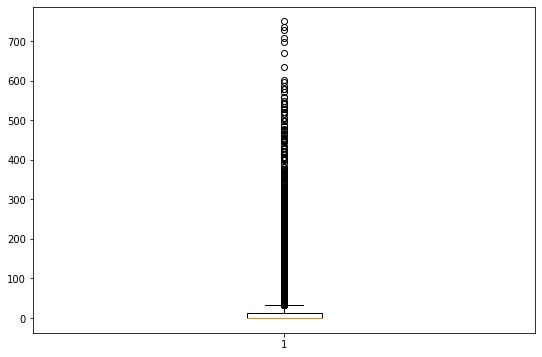

In [256]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)
ax.boxplot(df_drop['VECTOR_OBJETIVO'])

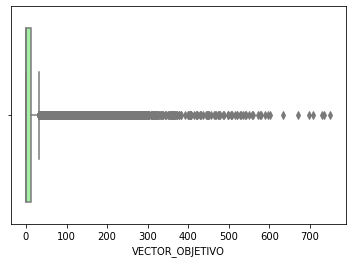

In [257]:
sns.boxplot(df_drop['VECTOR_OBJETIVO'], color="PaleGreen");

In [267]:
df_drop_1 = df_drop.loc[:,['Zona', 'ADHR_SEGMENTO', 'ADHR_MACROSEGMENTO', 'ADHR_CCHC', 'MPMR_MASA_MEDIAN', 'REM_PROMEDIO', 'ACEC_CODIGO_AGG', 'holding_bin', 'VECTOR_OBJETIVO']]

In [268]:
tipo_variable(df_corr)

La variable Zona es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo int64.
La variable MPMR_MASA_MEDIAN es de tipo float64.
La variable REM_PROMEDIO es de tipo float64.
La variable ACEC_CODIGO_AGG es de tipo int32.
La variable holding_bin es de tipo int32.
La variable VECTOR_OBJETIVO es de tipo float64.


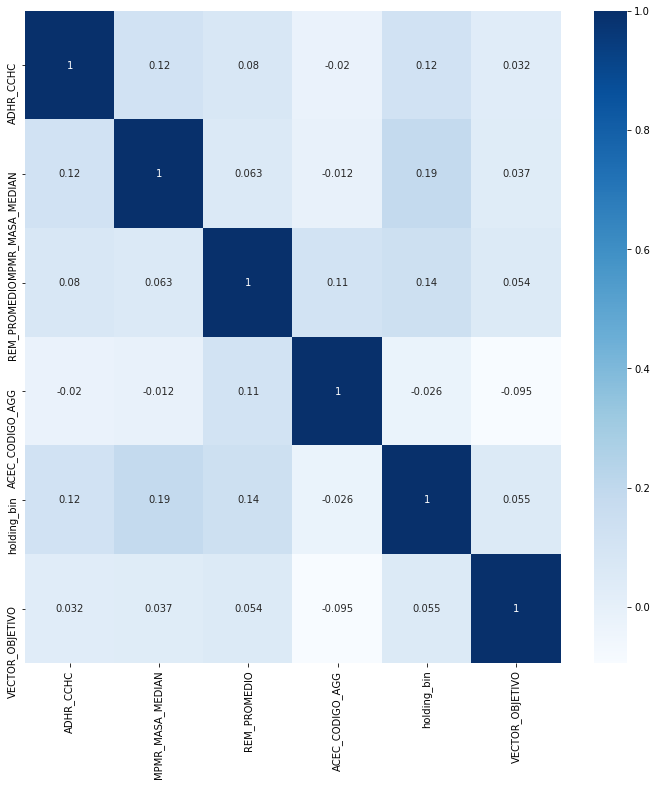

In [270]:
plt.figure(figsize=(12,12))
sns.heatmap(df_drop_1.corr(), cmap='Blues', annot=True);

In [271]:
#df_drop.to_excel('Base analisis.xlsx')

In [272]:
#df_drop.head()

In [273]:
#tipo_variable(df_drop)

In [274]:
df_drop_1['VECTOR_OBJETIVO_REC'] = np.where(df_drop['VECTOR_OBJETIVO'] < 1, 0, 1)

Text(0.5, 0, 'Riesgo')

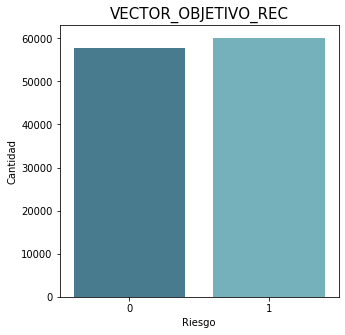

In [276]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_drop_1,x='VECTOR_OBJETIVO_REC', palette="GnBu_d", orient='v')
plt.title('VECTOR_OBJETIVO_REC', fontsize=15)
plt.ylabel('Cantidad')
plt.xlabel('Riesgo')

In [278]:
df_drop_1.columns

Index(['Zona', 'ADHR_SEGMENTO', 'ADHR_MACROSEGMENTO', 'ADHR_CCHC',
       'MPMR_MASA_MEDIAN', 'REM_PROMEDIO', 'ACEC_CODIGO_AGG', 'holding_bin',
       'VECTOR_OBJETIVO', 'VECTOR_OBJETIVO_REC'],
      dtype='object')

In [281]:
df_drop_1.sample(10)

,Zona,ADHR_SEGMENTO,ADHR_MACROSEGMENTO,ADHR_CCHC,MPMR_MASA_MEDIAN,REM_PROMEDIO,ACEC_CODIGO_AGG,holding_bin,VECTOR_OBJETIVO,VECTOR_OBJETIVO_REC
99114,SUR,PYME,PYME,0,5.0,275970.0,1,0,0.0,0
109919,CENTRO,PYME,PYME,0,3.0,376237.0,9,0,0.0,0
32628,SUR,PYME,PYME,0,4.0,514650.0,1,0,26.0,1
39860,CENTRO,PYME,EMPR,0,57.0,1945143.0,8,1,15.0,1
74187,CENTRO,PYME,PYME,0,1.0,372632.0,8,0,0.0,0
48419,CENTRO,PYME,PYME,0,10.0,564444.0,8,0,7.0,1
29029,CENTRO,PYME,PYME,0,7.0,206667.0,5,0,17.5,1
87975,CENTRO,PYME,PYME,0,5.0,746917.0,9,0,0.0,0
27372,CENTRO,PYME,PYME,0,50.0,617686.0,9,0,40.0,1
76960,CENTRO,PYME,PYME,0,2.0,332029.0,7,0,0.0,0


In [282]:
cruce = pd.crosstab(df_drop_1["Zona"], df_drop_1['VECTOR_OBJETIVO_REC'], rownames=['df_drop_1["Zona"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""Zona""]",,
CENTRO,47203,47861
NORTE,4469,4561
SUR,6142,7664


In [283]:
cruce = pd.crosstab(df_drop_1["ADHR_SEGMENTO"], df_drop_1["VECTOR_OBJETIVO_REC"], rownames=['df_drop_1["ADHR_SEGMENTO"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""ADHR_SEGMENTO""]",,
CORP,437,3875
F-500,57,650
INDEP,12944,1517
INST,0,117
PYME,38684,52812
TCP,5692,1115


In [284]:
cruce = pd.crosstab(df_drop_1["ADHR_MACROSEGMENTO"], df_drop_1['VECTOR_OBJETIVO_REC'], rownames=['df_drop_1["ADHR_MACROSEGMENTO"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""ADHR_MACROSEGMENTO""]",,
CCHC,57,700
CORP,196,1840
EMPR,251,2661
GC,34,286
PYME,38678,51986
TCP,5687,1114
TI,12911,1499


In [285]:
cruce = pd.crosstab(df_drop_1["ADHR_CCHC"], df_drop_1['VECTOR_OBJETIVO_REC'], rownames=['df_drop_1["ADHR_CCHC"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""ADHR_CCHC""]",,
0,57761,59359
1,53,727


In [286]:
cruce = pd.crosstab(df_drop_1["ACEC_CODIGO_AGG"], df_drop_1['VECTOR_OBJETIVO_REC'], rownames=['df_drop_1["ACEC_CODIGO_AGG"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""ACEC_CODIGO_AGG""]",,
1,2838,5125
2,110,218
3,3004,6272
4,140,245
5,9354,12401
6,7998,11234
7,5657,6655
8,10902,8518
9,17811,9418


In [287]:
cruce = pd.crosstab(df_drop_1["holding_bin"], df_drop_1['VECTOR_OBJETIVO_REC'], rownames=['df_drop_1["holding_bin"]'], colnames=['df_drop_1["VECTOR_OBJETIVO_REC"]'])
cruce

"df_drop_1[""VECTOR_OBJETIVO_REC""]",0,1
"df_drop_1[""holding_bin""]",,
0,57166,56248
1,648,3838


In [288]:
X = df_drop_1.drop(['VECTOR_OBJETIVO', 'VECTOR_OBJETIVO_REC'], axis=1)
y = df_drop_1['VECTOR_OBJETIVO_REC']

In [289]:
X.head()

,Zona,ADHR_SEGMENTO,ADHR_MACROSEGMENTO,ADHR_CCHC,MPMR_MASA_MEDIAN,REM_PROMEDIO,ACEC_CODIGO_AGG,holding_bin
0,CENTRO,F-500,GC,0,5750.0,739126.0,7,0
1,CENTRO,F-500,GC,0,1926.0,757107.0,7,1
2,CENTRO,F-500,GC,0,3802.0,691718.0,7,1
3,CENTRO,F-500,GC,0,23996.0,510440.0,6,1
4,CENTRO,F-500,GC,0,16048.0,510811.0,6,1


In [290]:
X['ACEC_CODIGO_AGG'] = X['ACEC_CODIGO_AGG'].astype(object)

In [291]:
X = pd.get_dummies(X)

In [292]:
X.head()

,ADHR_CCHC,MPMR_MASA_MEDIAN,REM_PROMEDIO,holding_bin,Zona_CENTRO,Zona_NORTE,Zona_SUR,ADHR_SEGMENTO_CORP,ADHR_SEGMENTO_F-500,ADHR_SEGMENTO_INDEP,...,ADHR_MACROSEGMENTO_TI,ACEC_CODIGO_AGG_1,ACEC_CODIGO_AGG_2,ACEC_CODIGO_AGG_3,ACEC_CODIGO_AGG_4,ACEC_CODIGO_AGG_5,ACEC_CODIGO_AGG_6,ACEC_CODIGO_AGG_7,ACEC_CODIGO_AGG_8,ACEC_CODIGO_AGG_9
0,0,5750.0,739126.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1926.0,757107.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,3802.0,691718.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,23996.0,510440.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,16048.0,510811.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [293]:
tipo_variable(X)

La variable ADHR_CCHC es de tipo int64.
La variable MPMR_MASA_MEDIAN es de tipo float64.
La variable REM_PROMEDIO es de tipo float64.
La variable holding_bin es de tipo int32.
La variable Zona_CENTRO es de tipo uint8.
La variable Zona_NORTE es de tipo uint8.
La variable Zona_SUR es de tipo uint8.
La variable ADHR_SEGMENTO_CORP es de tipo uint8.
La variable ADHR_SEGMENTO_F-500 es de tipo uint8.
La variable ADHR_SEGMENTO_INDEP es de tipo uint8.
La variable ADHR_SEGMENTO_INST es de tipo uint8.
La variable ADHR_SEGMENTO_PYME es de tipo uint8.
La variable ADHR_SEGMENTO_TCP es de tipo uint8.
La variable ADHR_MACROSEGMENTO_CCHC es de tipo uint8.
La variable ADHR_MACROSEGMENTO_CORP es de tipo uint8.
La variable ADHR_MACROSEGMENTO_EMPR es de tipo uint8.
La variable ADHR_MACROSEGMENTO_GC es de tipo uint8.
La variable ADHR_MACROSEGMENTO_PYME es de tipo uint8.
La variable ADHR_MACROSEGMENTO_TCP es de tipo uint8.
La variable ADHR_MACROSEGMENTO_TI es de tipo uint8.
La variable ACEC_CODIGO_AGG_1 es d

In [294]:
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 1163)

In [560]:
#X_train_sc = StandardScaler().fit_transform(X_train)
#X_test_sc = StandardScaler().fit_transform(X_test)

In [295]:
#Regresión logistica

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions_reg = model.predict(X_test)
model.score(X_test,y_test)

0.7014418999151824

In [296]:
# Arbol de decisión

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions_arb = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

0.6949957591178966

In [1]:
################## Arbol ###############

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

NameError: name 'X_train' is not defined

In [2]:
############## Curvas ROC  #########

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib
import matplotlib.pyplot as plt


# Regresion logistica
model_bag = linear_model.LogisticRegression()
model_bag.fit(X_train, y_train)
model_bag = model_bag.predict_proba(X_test)[:, 1]

# Arbol de decision
model_bag2 = tree.DecisionTreeClassifier()
model_bag2.fit(X_train, y_train)
model_bag2 = model_bag2.predict_proba(X_test)[:, 1]

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_bag)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='AUC Bag logistica={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_bag2)
plt.plot(fpr, tpr, color='green', lw=2,
         label='AUC Bag Arboles={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()


NameError: name 'linear_model' is not defined

In [298]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
m1_confusion = confusion_matrix(y_test, predictions_reg)
m1_confusion

array([[10817,  6563],
       [ 3997, 13993]], dtype=int64)

In [299]:
#Acurracy
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test, predictions_reg)
m1_acc

0.7014418999151824

In [300]:
from sklearn.metrics import precision_score, recall_score
m1_prec = precision_score(y_test, predictions_reg)
m1_rec = recall_score(y_test, predictions_reg)
print("Precision: ", m1_prec, "\nRecall: ", m1_rec)

Precision:  0.680725822144386 
Recall:  0.7778210116731518


In [301]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_reg))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67     17380
           1       0.68      0.78      0.73     17990

    accuracy                           0.70     35370
   macro avg       0.71      0.70      0.70     35370
weighted avg       0.71      0.70      0.70     35370



In [302]:
from sklearn.metrics import roc_curve
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat = model.predict_proba(X_test)[:, 1]
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

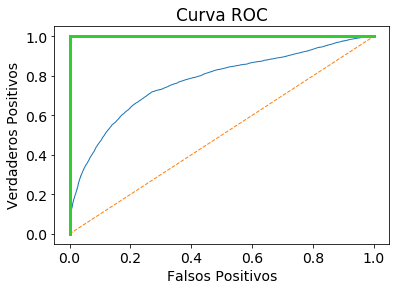

In [303]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [304]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat)
print('El area bajo la curva ROC es ' ,roc_auc_score(y_test, yhat)*100 )

El area bajo la curva ROC es  77.33628962772438
